<h1>Fluorescence Anisotropy Analysis</h1>

A step-by-step guide is provided below demonstrating the usage of all functinos on the example data set.

<h2>Importing the package</h2>

In [1]:
from flu_ani_analysis.flu_ani_analysis_module import FA as fa

<h2>Importing raw data</h2>

You can import the raw data in csv format that was exported from Perkin Elmer Envision instruments using the `read_in_envision` function. Reading in the data requires a plate map that contains information about every well.

Data in both plate and list format can be read in using the same function and the number of wells on the plate has to be specified.

In [2]:
data_file = 'HsPEX5C Y467C vs AtPEX5C WT.csv'                # Note that this will only work if the files are in the same folder
platemap_file = 'HsPEX5C Y467C vs AtPEX5C WT platemap.csv'   # as this Jupyter notebook, alternatively you can provide a full file path

my_data = fa.read_in_envision(data_csv=data_file, platemap_csv=platemap_file, data_type='plate', size=384)

Data has been uploaded!

Value of g-factor: 1.0 
Number of repeats: 1 
Overall number of empty cells is 192 in 2 data frames.


<h2>Visualising the data for each well</h2>

The imported data is stored as pandas data frames in a nested dictionary. 
You can display the contents of each well (both the imported data and data from platemap) using the `visualise` function. 

The `labelby` argument specifes what is displayed in on the well and `colorby` argument controls its color. All the platemap column names such as *Type*, *Contents*, *Protein Name*, *Protein Concentration*, *Tracer Name*, *Tracer Concentration* can be passed as `labelby` and `colorby` arguments. To display the imported data such as *p* and *s* channel intensity, pass a tuple of repeat number and the specified variable, e.g. `('repeat_1, 'p')`.

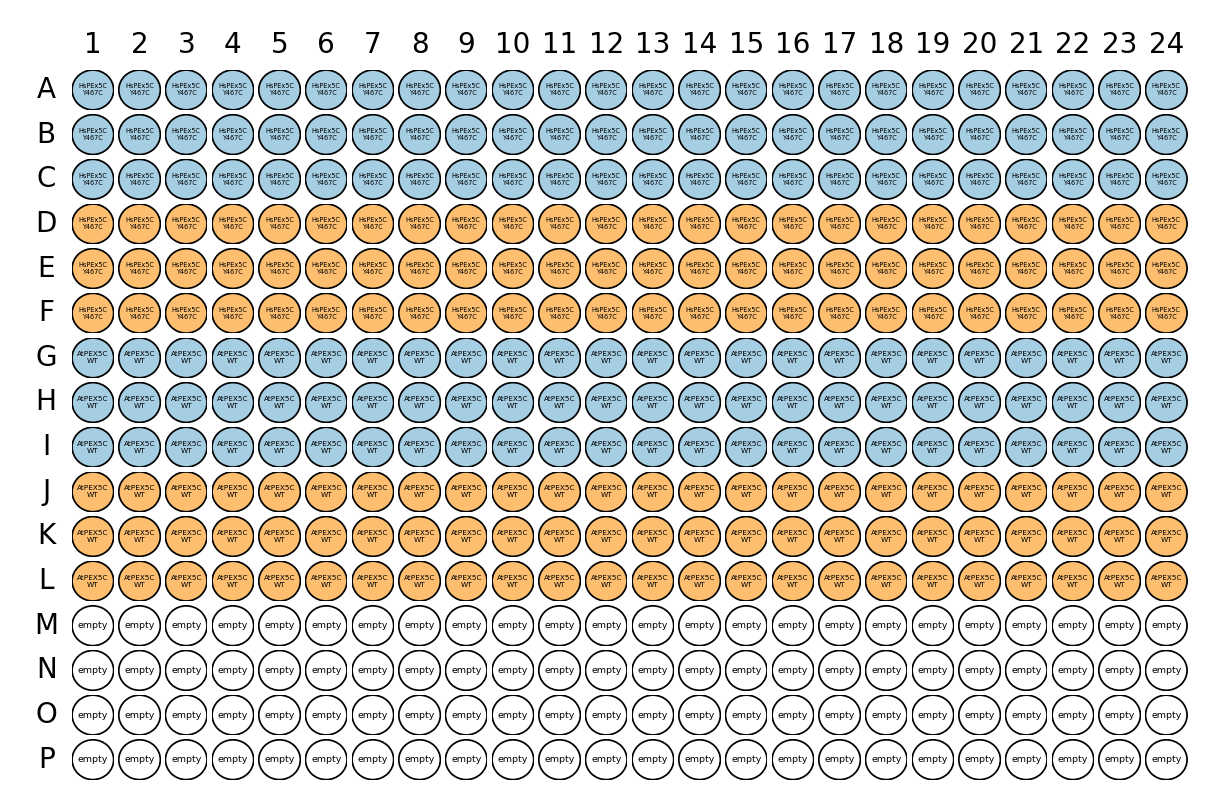

In [3]:
my_data.visualise(labelby='Protein Name', colorby='Type')

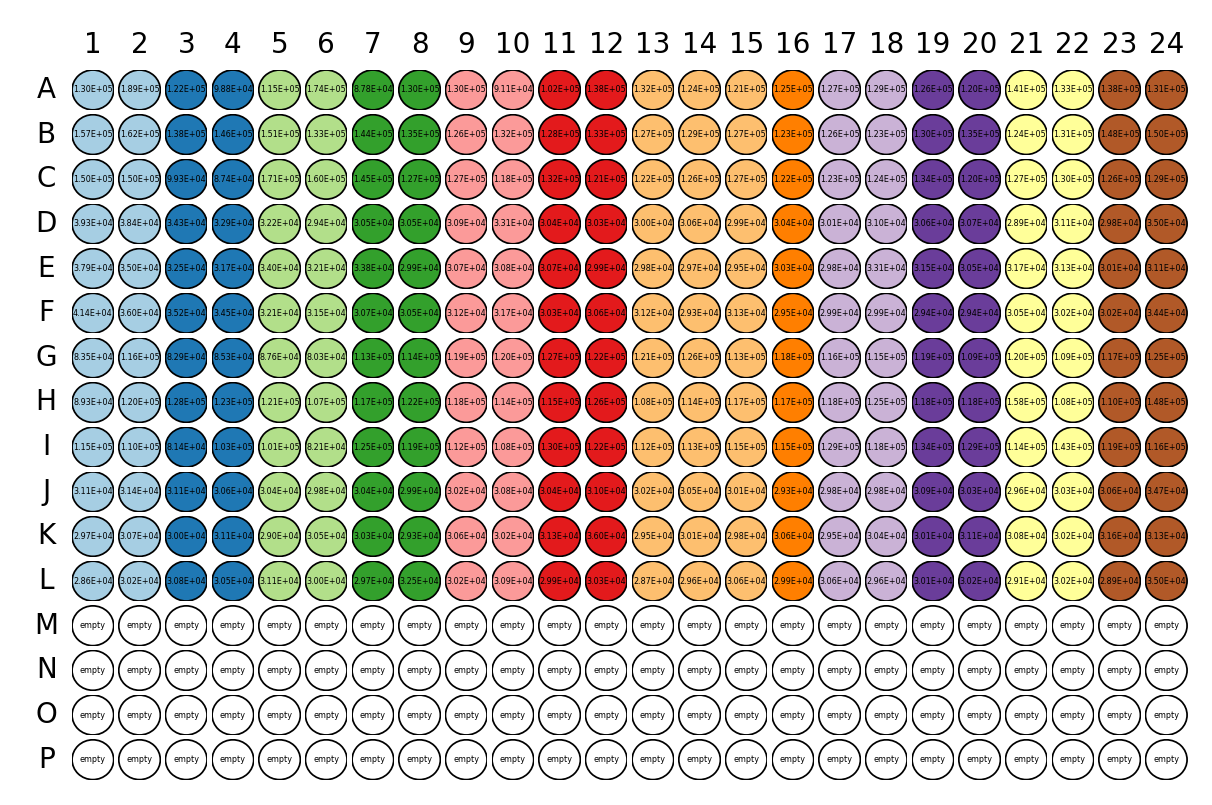

In [4]:
my_data.visualise(labelby=('repeat_1', 'p'), colorby='Protein Concentration')

<h2>Invalidation</h2>

You can invalidate individual `wells` and/or entire `rows` or `columns` by pasing any of those three keyword arguments or their combination to the `invalidate` function. The invalidated wells will not be taken into consideration in subseqent calculations or displayed on the graphs. They can be made valid again by additionally passing the `valid=True` argument.

In [5]:
my_data.invalidate(wells=['A1', 'C3'])

The invalideted wells are marked with red stripes:

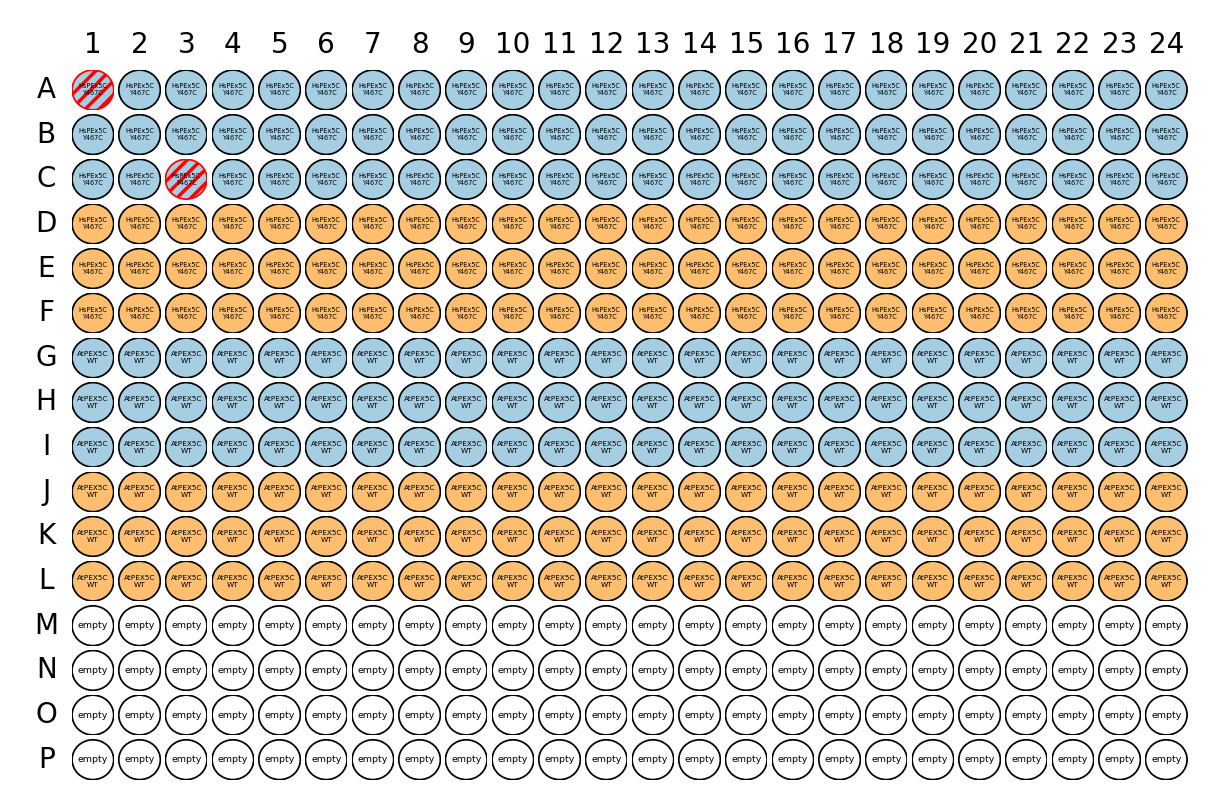

In [6]:
my_data.visualise(labelby='Protein Name', colorby='Type')

<h2>Background correction</h2>

To calculate the background corrected values for *p* and *s* channel intensity in all repeats use the `background_correct` function.

The backgorund correction is done by subtracting the mean value of blank *p* (or *s*) channel intensity for a given protein (or tracer) concentration from each value of the *p* or *s* channel intensity for that concentration. 

To display the background corrected values on the platemap use the *p_corrected* or *s_corrected* as a variable along the repeat number in the `visualise` functinon.

Background correction can be performed multiple times on a sigle data set, the existing corrected data will be overwritten.

In [7]:
my_data.background_correct()

Background correction has been successfully performed!


<h2>Anisotropy and intensity calculation</h2>

The `calculate_r_i` function calculates the anisotropy and intensity for each well in all repeats using the following formulas:
<p><em>I = s + (2*g*p)</em></p>
<p><em>r = (s - (g*p)) / I</em></p>
<p>Where <em>I</em> is fluorescence intensity, <em>r</em> is anisotropy, <em>g</em> is g factor, <em>p</em> is p channel intensity, <em>s</em> is s channel intensity.</p>
         
If the `correct=False` argument is passed the anisotropy an fluorescence inensity will only be calculated using the raw *p* and *s* channel values and not the background corrected values. The variables for the `visualise` funtion are: *i_raw*, *r_raw*, *i_corrected* and *r_corrected*.

The functinon also calculates the percentage intesity of the non blank well as comapred to the blank corrected wells. By default the plot of the percentage inestiy against the well ids for all repeats is displayed along with a summary of wells above the threshold (defaults to 80%), however it can be turned off by passing the `plot_i=False` argument.

The fluorescence intensity and anisotropy have been successfully calculated!



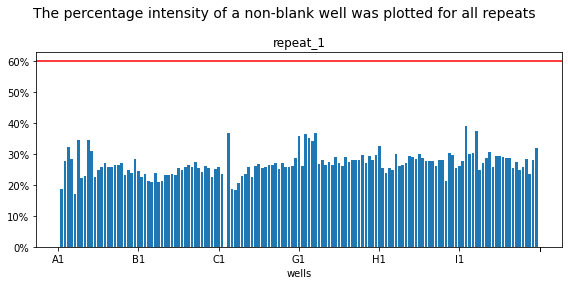

None of the wells has the percentage intensity value above the 60% threshold.


In [8]:
my_data.calculate_r_i(thr=60)

If you want to just display the percetnage intensity plots after the anisotropy and intensity caluclation use the `plot_i_percent` function.

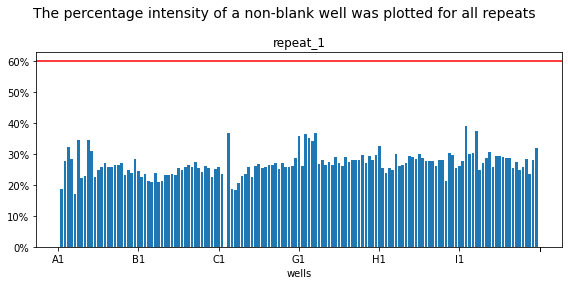

None of the wells has the percentage intensity value above the 60% threshold.


In [9]:
my_data.plot_i_percent()

<h2>Mean anisotropy and intensity calculation</h2>

To calculate the mean anisotropy and intensity along with their standard deviation and standrad error for all replicates for a given protein (or tracer) concentration use `calc_data_to_fit` function. This data is required for subsequent logistic curve fitting. 

In [10]:
my_data.calc_data_to_fit()

<h2>Logistic curve fitting</h2>

The `logistic_fit_all` functinon fits a logistic curve to the plot of anisotropy and intensity against protein (or tracer) concentration for each unique protein-tracer pair for all repeats. The fittting equation is: 
<p><em>r = (rmin - rmax) / (1 + (pc/EC50)^hill) + rmax</em></p>
<p>Where pc is protein concentration, rmin is the lower asymptote, rmax is the upper asymptote, EC50 is midpoint of transition (pc at point of inflection), hill is the slope.</p>

The `curve_fit` function from SciPy module is used for fitting and so all arguments accepted by this function can be passed as keyword arguments to the `logistic_fit_all` function. The exception is `sigma` argument which is passed as either `sig='std'` or `sig='sem'` to perform the curve fitting taking into account the specified errors.

In [11]:
my_data.logistic_fit_all()

C:\Program Files (x86)\anaconda3\lib\site-packages\flu_ani_analysis\flu_ani_analysis_module.py:679: RuntimeWarning: The curve fitting failed in the following cases:

[('repeat_1', 'i', ('AtPEX5C WT', 'Lissamine-YQSKL'), RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 1000.'))]

Use the 'logistic_fit_pair' function to adjust the initial guess for the parameters or pass other arguments to the fitting function.
  warnings.warn(f"The curve fitting failed in the following cases:\n\n{errors}\n\nUse the 'logistic_fit_pair' function to adjust the initial guess for the parameters or pass other arguments to the fitting function.", RuntimeWarning)


If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases you can use the `logistic_fit_pair` function to do the curve fitting for only one specific protein-tracer pair and variable and try passing additional arguments such as `sig`, `p0`, `bounds`, etc.

In [13]:
my_data.logistic_fit_pair(rep='repeat_1', var='I', pair=('AtPEX5C WT', 'Lissamine-YQSKL'), sig='std', p0=[500000, 300000, 1300, 2])

You can display the plots of anisotropy and intensity against the protein (or tracer) concentration with a resulting logisitc curve for all repeats using the `plot_ani_all` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`).

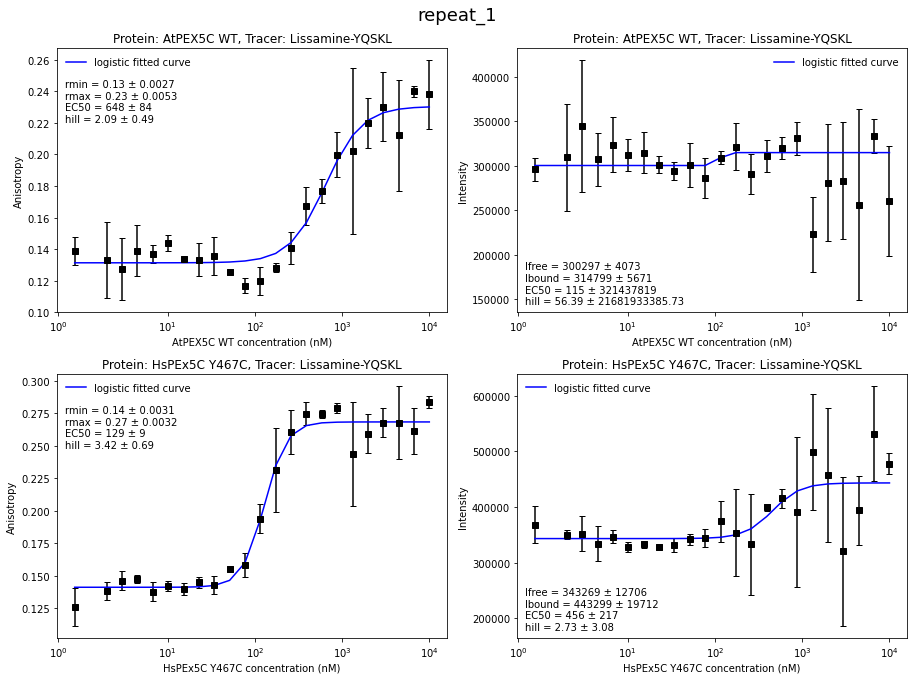

In [14]:
my_data.plot_ani_all()

If you want to display a plot for just one variable use the `plot_ani` function and specify the repeat number, variable and preotein-tracer pair.

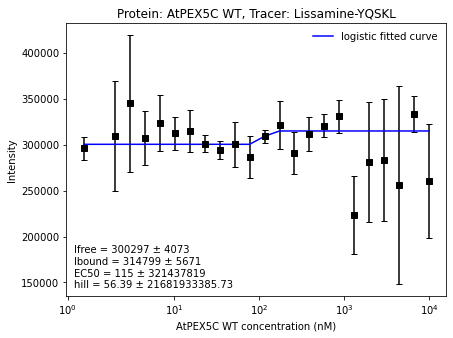

In [16]:
my_data.plot_ani(rep='repeat_1', var='i', pair=('AtPEX5C WT', 'Lissamine-YQSKL'))

The fitting parameters (rmin, rmax, EC50, etc.) are stored in a single `fit_params` data frame for each repeat.

In [18]:
my_data.data_dict['repeat_1']['data']['fit_params']

,,rmin,rmin error,rmax,rmax error,r_EC50,r_EC50 error,r_hill,r_hill error,Ifree,Ifree error,Ibound,Ibound error,I_EC50,I_EC50 error,I_hill,I_hill error,lambda
HsPEx5C Y467C,Lissamine-YQSKL,0.141182,0.00308432,0.268484,0.00317768,128.524,8.79569,3.41695,0.694313,343269,12706.3,443299,19712.4,456.389,217.405,2.7312,3.0814,1
AtPEX5C WT,Lissamine-YQSKL,0.131289,0.00274416,0.230477,0.00533703,648.136,83.9266,2.08634,0.488165,300297,4072.69,314799,5670.9,114.771,3.21438e+08,56.3926,2.16819e+10,1


<h2>Lambda calcualtion</h2>

Using the `calc_lambda` function you can caluclate the lambda value for each protein-tracer pair in all repeats and choose whether you want to save it or leave te dafult value of 1. If you do not choose any of the calcualted lambda values you still have choose the rmin and rmax values for each protein-tracer pair.

In [20]:
my_data.calc_lambda()

Choose the lambda values that will be saved for each protein-tracer pair. 
If you choose more than one lambda value for a given protein-tracer pair, only the first choice will be saved.
If you do not choose any lambda value for a given protein-trcacer pair, then you have select the rmin and rmax for this pair.


Button(description='Save', style=ButtonStyle())

Selected values were saved.


The selected values are stored in the `final_fit` data frame.

In [22]:
my_data.final_fit

,,rmin,rmin error,rmax,rmax error,lambda,Kd,Kd error
HsPEx5C Y467C,Lissamine-YQSKL,0.141182,0.00308432,0.268484,0.00317768,1,NaN,NaN
AtPEX5C WT,Lissamine-YQSKL,0.131289,0.00274416,0.230477,0.00533703,1,NaN,NaN


<h2>Amount bound calculation</h2>

<h2>Sigle site curve fitting</h2>

<h2>Exporting the fitting parameters and figures</h2>

<h2>Importing the fitting parameters</h2>